<a href="https://colab.research.google.com/github/VM-137/Data-Analysis-using-Pyspark/blob/main/Data_Analysis_using_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome**
[Here are the data that you need to import/mirror to your google drive, and then mount it](https://drive.google.com/drive/folders/1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim)


### Let's mount the google drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [ ]:
!pip install pyspark

Importing the modules 

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max 
import matplotlib.pyplot as plts

creating spark session

In [5]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [8]:
listening_csv_path = '/content/drive/My Drive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

let's check the data:

In [9]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [10]:
listening_df = listening_df.drop('date') 

drop the null rows:

In [12]:
listning_df = listening_df.na.drop()

let's check the dataset again:

In [13]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [15]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [17]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(14650594, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [18]:
q0 = listening_df.select('artist', 'track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [20]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|Rihanna - We All ...|Rihanna|                null|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [26]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
| Pinky_von_Pout|  115|
|          jzshy|  111|
|     nicolashaw|  108|
|        tombtch|  107|
|    sophstar007|  106|
|      djbXathia|  105|
|    Aims_rose18|  103|
| duttywhineross|  101|
|          Lewzy|  100|
|        freekai|   99|
+---------------+-----+
only showing top 20 rows



**Query #3:**

find top 10 famous tracks 

In [29]:
q3 = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------------+-----------------+-----+
|              artist|            track|count|
+--------------------+-----------------+-----+
|       Justin Bieber|            Sorry| 3492|
|      Arctic Monkeys| Do I Wanna Know?| 2986|
|            Bon Iver|      Skinny Love| 2933|
|         The Killers|    Mr Brightside| 2844|
|                Zayn|       PILLOWTALK| 2772|
|            Bastille|          Pompeii| 2752|
|      Mumford & Sons|  Little Lion Man| 2725|
|             Rihanna|             Work| 2691|
|      Mumford & Sons|         The Cave| 2653|
|Florence + the Ma...|Dog Days Are Over| 2606|
+--------------------+-----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [34]:
q4 = listening_df.select('artist', 'track').filter(listening_df.artist =='Rihanna').groupBy('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2691|
|Rihanna|Only Girl (In the...| 1829|
|Rihanna|We Found Love (fe...| 1754|
|Rihanna|            Rude Boy| 1390|
|Rihanna|                 S&M| 1368|
|Rihanna|            Diamonds| 1314|
|Rihanna|      Kiss it Better|  953|
|Rihanna| Where Have You Been|  899|
|Rihanna|Cheers (Drink to ...|  715|
|Rihanna|           Disturbia|  691|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [37]:
q5 = listening_df.select('artist', 'album').groupBy('artist', 'album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [38]:
genre_csv_path = '/content/drive/My Drive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

let's check the data

In [39]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [40]:
data = listening_df.join(genre_df, how = 'inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [45]:
q6 = data.select('user_id').filter(data.genre == 'pop').groupBy('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|    musicboy80s|  384|
|   BlueKnockOut|  378|
|  incultojurgis|  374|
| ElektricOrchid|  371|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|        DP_Sage|  320|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [47]:
q7 = data.select('genre').groupBy('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2811365|
|       pop|1653729|
|electronic| 590315|
|   hip hop| 568489|
|      folk| 460192|
|indie rock| 450651|
|      punk| 397175|
|       r&b| 370578|
|     indie| 220224|
|     metal| 217371|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [61]:
q8 = data.select('user_id', 'genre').groupBy('user_id', 'genre').agg(count('*').alias('count')).orderBy('user_id')
q8 .show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|               Bjorn|    8|
| --Seph|          french pop|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|        instrumental|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|               samba|    2|
| --Seph|             ambient|    6|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|             baroque|    1|
| --Seph|     Hilko Schomerus|    1|
| --Seph|      Kendrick Lamar|    4|
| --Seph|             hip hop|    7|
| --Seph|          electronic|    6|
| --Seph|                rock|   29|
| --Seph| London Symphony ...|    1|
| --Seph|                fado|    1|
| --Seph|          soundtrack|    1|
| --Seph| Richard Armitage...|    1|
| --Seph|                 RBX|    4|
| --Seph|              techno|    4|
+-------+--------------------+-----+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [63]:
q9 = genre_df.select('genre').filter( (col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop')).groupBy('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [64]:
q9_list = q9.collect()

In [65]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [66]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

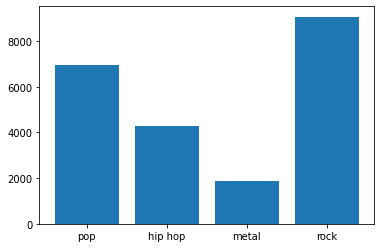

In [67]:
plts.bar(labels,counts)